In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [23]:
# define hyperparameters
num_trials = 10000
eps = 0.01
bandit_prob = [0.2, 0.5, 0.75]  # we define 3 bandits

In [32]:
class Bandit:
    '''
    defining the slot machine,
    -p is the win rate
    -has pull method
    -maintains the win rate over time'''
    
    def __init__(self, p):
        self.p = p
        self.p_estimate = 0
        self.N = 0  # number of trials
    
    def pull(self):
        # draw a 1 with probability p
        return np.random.random() < self.p
    
    def update(self, x):
        self.N += 1
        self.p_estimate = self.p_estimate + (1/self.N)*(x - self.p_estimate)
        #print(self.p_estimate)

def experiment():
    bandits = [Bandit(p) for p in bandit_prob]
    
    rewards = np.zeros(num_trials)
    num_times_explored = 0
    num_times_exploited = 0
    num_optimal = 0
    optimal_j = np.argmax([b.p for b in bandits])
    print("optimal j:", optimal_j)
    
    for i in range(num_trials):
        if np.random.random() < eps:
            num_times_explored += 1
            j = np.random.choice([0,1,2])
        else:
            num_times_exploited += 1
            j = np.argmax([b.p_estimate for b in bandits])
        if j == optimal_j:
            num_optimal += 1
        
        # pull the arm for the selcted bandit
        x = bandits[j].pull()
        
        # update rewards log
        rewards[i] = x
        
        # update the selected bandit
        bandits[j].update(x)
    return rewards, num_times_explored, num_times_exploited, num_optimal

rewards, num_times_explored, num_times_exploited, num_optimal = experiment()

for b in bandits:
    print("mean estimate", b.p_estimate)

# print total reward
print("total reward earned:", rewards.sum())
print("overall win rate:", rewards.sum() / num_trials)
print("num_times_explored:", num_times_explored)
print("num_times_exploited:", num_times_exploited)
print("num_times_optimal_bandit_selected:", num_optimal)

optimal j: 2
mean estimate 0
mean estimate 0
mean estimate 0
total reward earned: 7391.0
overall win rate: 0.7391
num_times_explored: 117
num_times_exploited: 9883
num_times_optimal_bandit_selected: 9804


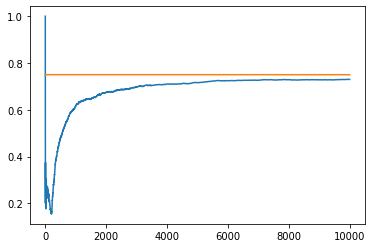

In [25]:
# plot the results
cumulative_rewards = np.cumsum(rewards)
win_rates = cumulative_rewards / (np.arange(num_trials) + 1)
plt.plot(win_rates)
plt.plot(np.ones(num_trials)*np.max(bandit_prob))
plt.show();

In [36]:
bandits[0].update(1)

NameError: name 'N' is not defined